## SVC Classifier
The model predicts the severity of the landslide (or if there will even be one) within the next 2 days, based on weather data from the past 5 days.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.utils import shuffle
import pickle

In [164]:
# df = pd.read_csv("full_dataset_v1.csv")
# df = pd.read_csv("/Users/ishaanjavali/Documents/Science Fair/2020/Code/API/full_dataset_v1.csv")
df = pd.read_csv("/Users/ishaanjavali/Documents/Science Fair/2020/Code/API/full_dataset_good.csv")
df.shape

(8953, 193)

In [147]:
df['severity'].value_counts()

na              4476
medium          3300
small            612
large            426
unknown           75
very_large        56
...                5
landslide          2
catastrophic       1
Name: severity, dtype: int64

In [148]:
# filter by severity. na is for non-landslide data
df = df[df['severity'].isin(["medium", "small", "large", "very_large", "na"])]
# Remove -1 slopes
df = df.loc[~(df.slope == -1)]

na                     4476
landslide              3681
mudslide                371
rock_fall               150
complex                  75
debris_flow              39
other                    24
riverbank_collapse       23
unknown                   9
translational_slide       7
snow_avalanche            6
lahar                     3
earth_flow                3
rotational_slide          2
...                       1
Name: type, dtype: int64


In [149]:
df['severity'].value_counts()
df = shuffle(df)
df.reset_index(inplace=True, drop=True)
print(len(df))

8870


In [150]:
def getX():
    X = df.copy()

    X.drop(X.columns[[i for i in range(0, 151)]], axis = 1, inplace = True)
    # X.drop(X.columns[[i for i in range(20, 35)]], axis = 1, inplace = True)
    X["severity"] = df["severity"]
    X.drop(X.columns[[0]], axis = 1, inplace = True)

    X = X.dropna()
    for i in range(0, 8):
        del X['air' + str(i)]
        del X['temp' + str(i)]
        del X['humidity' + str(i)]
        
    X.drop(X.columns[[i for i in range(len(X.columns)-8, len(X.columns)-2)]], axis = 1, inplace = True)
    return X
X = getX()
X

,precip7,wind7,precip6,wind6,precip5,wind5,precip4,wind4,precip3,wind3,slope,severity
0,0.0,14,0.0,14,0.0,21,0.0,27,0.0,27,145,medium
1,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,12,large
2,0.0,14,0.0,15,0.0,14,0.2,12,1.0,12,172,na
3,3.2,31,2.5,24,4.2,29,1.2,33,6.3,34,47,small
4,2.2,12,3.6,11,1.3,10,0.5,11,0.4,12,168,na
...,...,...,...,...,...,...,...,...,...,...,...,...
8865,4.2,6,4.1,5,3.9,7,1.9,10,3.1,8,95,na
8866,1.4,5,1.9,4,0.9,5,6.8,5,9.5,5,107,medium
8867,0.7,8,0.7,9,3.7,9,2.0,9,1.0,9,33,na
8868,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,51,medium


In [151]:
def generate_labels(binary = False):
    global X
    X = getX()
    y = []
    idx_to_severity = ["na", "small", "medium", "large", "very_large"]
    for severity in X.severity:
        if not binary:
            y.append(idx_to_severity.index(severity))
        elif severity == "na":
            y.append(0)
        else:
            y.append(1)
    X.drop(X.columns[[-1]], axis = 1, inplace = True)
    print(y.count(1))
    return y

In [152]:
binary = True
y = generate_labels(binary)

4394


In [153]:
X

,precip7,wind7,precip6,wind6,precip5,wind5,precip4,wind4,precip3,wind3,slope
0,0.0,14,0.0,14,0.0,21,0.0,27,0.0,27,145
1,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,12
2,0.0,14,0.0,15,0.0,14,0.2,12,1.0,12,172
3,3.2,31,2.5,24,4.2,29,1.2,33,6.3,34,47
4,2.2,12,3.6,11,1.3,10,0.5,11,0.4,12,168
...,...,...,...,...,...,...,...,...,...,...,...
8865,4.2,6,4.1,5,3.9,7,1.9,10,3.1,8,95
8866,1.4,5,1.9,4,0.9,5,6.8,5,9.5,5,107
8867,0.7,8,0.7,9,3.7,9,2.0,9,1.0,9,33
8868,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,51


## Scaling

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## PCA

In [155]:
from sklearn.decomposition import PCA
pca = PCA(0.9)

principalComponents = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.36659294, 0.22010174, 0.09099556, 0.08070899, 0.0611546 ,
       0.05081662, 0.04398091])

In [156]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [157]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf', verbose = True)

In [158]:
svclassifier.fit(X_train, y_train)

[LibSVM]

SVC(verbose=True)

In [159]:
from sklearn.metrics import accuracy_score
pred = svclassifier.predict(X_test)
print("ACCURACY:" ,accuracy_score(pred, y_test))

ACCURACY: 0.5997745208568207


## Testing gamma and c

In [160]:
from sklearn.metrics import accuracy_score
C_range =[1, 10, 100]
gamma_range = [0.1, 1, 10, 100]
for c in C_range:
    for g in gamma_range:
        svc2 = SVC(kernel='rbf', gamma=g,C=c, verbose = True)
        svc2.fit(X_train, y_train)
        print(c, g, ":",accuracy_score(y_test, svc2.predict(X_test)))

[LibSVM]1 0.1 : 0.5997745208568207
[LibSVM]1 1 : 0.6155580608793687
[LibSVM]1 10 : 0.6443066516347238
[LibSVM]1 100 : 0.6341600901916573
[LibSVM]10 0.1 : 0.5963923337091319
[LibSVM]10 1 : 0.6071025930101466
[LibSVM]10 10 : 0.6510710259301015
[LibSVM]10 100 : 0.6307779030439684
[LibSVM]100 0.1 : 0.59695603156708
[LibSVM]100 1 : 0.6138669673055243
[LibSVM]100 10 : 0.644870349492672
[LibSVM]100 100 : 0.6285231116121759


In [161]:
svc2 = SVC(kernel='rbf', gamma=10,C=10, verbose = True)
svc2.fit(X_train, y_train)
accuracy_score(y_test, svc2.predict(X_test))

[LibSVM]

0.6510710259301015

## Confusion Matrix

In [162]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, pred)
array

array([[583, 320],
       [390, 481]])

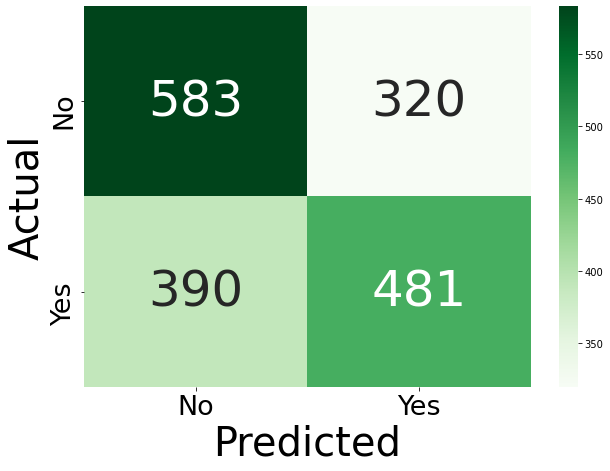

In [163]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

if binary:
    df_cm = pd.DataFrame(array, index = [i for i in ["No", "Yes"]],
                    columns = [i for i in ["No", "Yes"]])
else:
    df_cm = pd.DataFrame(array, index = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]],
                  columns = [i for i in ["None", "Small", "Medium", "Large", "Very Large"]])

plt.figure(figsize = (10,7))

ax = sn.heatmap(df_cm, cmap="Greens", annot=True, annot_kws={"size":50}, fmt='g')
ax.tick_params(axis='both', which='major', labelsize=27)
plt.xlabel('Predicted', fontsize = 40) 
# plt.title("KNN Confusion Matrix", fontsize = 50)
plt.ylabel('Actual', fontsize = 40) 

plt.show()